# Train Model

In [2]:
from load_data import DATA, PID_DATA
import numpy as np

n_question = 123 # from prepare_dataset
n_pid = 0 # from prepare_dataset, 0 if not used
seqlen = 200

model_type = 'pid'
batch_size = 64
n_blocks = 1
d_model = 256
dropout = 0.05
kq_same = 1
l2 = 1e-5
maxgradnorm = -1


In [3]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [5]:

def load_train_val_data(dat):
    train_pid = dat.load_data('train_pid.txt')
    # Split train_pid into training and validation data (80/20 split)
    total_samples = train_pid[0].shape[0]
    val_size = int(total_samples * 0.2)  # 20% for validation
    indices = np.arange(total_samples)
    np.random.shuffle(indices)

    train_indices = indices[val_size:]
    val_indices = indices[:val_size]

    # Extract train and validation data
    train_data = [x[train_indices] for x in train_pid]
    val_data = [x[val_indices] for x in train_pid]
    return train_data, val_data

In [6]:
if model_type == 'pid':
    dat = PID_DATA(n_question=n_question, seqlen=seqlen, separate_char=',')
else:
    dat = DATA(n_question=n_question, seqlen=seqlen, separate_char=',')
train_data = dat.load_data('train_pid.txt')
test_data, val_data = load_train_val_data(dat)

In [ ]:
from EduKTM import AKT

akt = AKT(n_question, n_pid, n_blocks, d_model, dropout, kq_same, l2, batch_size, maxgradnorm)
akt.train(train_data, val_data, epoch=100)
akt.save("akt.params")

[Epoch 0] LogisticLoss: 0.581161
[Epoch 0] auc: 0.800219, accuracy: 0.847499
[Epoch 1] LogisticLoss: 0.385175
[Epoch 1] auc: 0.807163, accuracy: 0.891226
[Epoch 2] LogisticLoss: 0.068194
[Epoch 2] auc: 0.809714, accuracy: 0.890795
[Epoch 3] LogisticLoss: 0.011556
[Epoch 3] auc: 0.806177, accuracy: 0.887173
[Epoch 4] LogisticLoss: 0.009903
[Epoch 4] auc: 0.803134, accuracy: 0.884862
[Epoch 5] LogisticLoss: 0.009660
[Epoch 5] auc: 0.805191, accuracy: 0.885283
[Epoch 6] LogisticLoss: 0.009337
[Epoch 6] auc: 0.802748, accuracy: 0.882611
[Epoch 7] LogisticLoss: 0.009374
[Epoch 7] auc: 0.799726, accuracy: 0.878146
[Epoch 8] LogisticLoss: 0.009334
[Epoch 8] auc: 0.800090, accuracy: 0.875353
[Epoch 9] LogisticLoss: 0.009299


INFO:root:save parameters to akt.params


[Epoch 9] auc: 0.799833, accuracy: 0.880176


In [9]:
akt.load("akt.params")
_, auc, accuracy = akt.eval(test_data)
print("auc: %.6f, accuracy: %.6f" % (auc, accuracy))

INFO:root:load parameters from akt.params


auc: 0.884144, accuracy: 0.801556


[I 2025-04-14 15:25:11,157] Using an existing study with name 'akt' instead of creating a new one.


[Epoch 0] LogisticLoss: 0.509249
[Epoch 0] auc: 0.819126, accuracy: 0.902020
[Epoch 1] LogisticLoss: 0.269318
[Epoch 1] auc: 0.867092, accuracy: 0.951459


[I 2025-04-14 15:29:08,424] Trial 2 finished with value: 0.9514589048113731 and parameters: {'n_blocks': 2, 'd_model': 512, 'dropout': 0.08173798056238564, 'kq_same': 1, 'l2': 9.826625022837036e-05, 'batch_size': 128, 'lr': 0.00024558685272735867, 'maxgradnorm': 0.1}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.569346
[Epoch 0] auc: 0.728580, accuracy: 0.790274
[Epoch 1] LogisticLoss: 0.322977
[Epoch 1] auc: 0.729251, accuracy: 0.809128


[I 2025-04-14 15:29:55,624] Trial 3 finished with value: 0.8091275293637263 and parameters: {'n_blocks': 3, 'd_model': 256, 'dropout': 0.18606546647836497, 'kq_same': 1, 'l2': 3.218483269993882e-06, 'batch_size': 32, 'lr': 0.0009186304740101928, 'maxgradnorm': 0.5}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.658098
[Epoch 0] auc: 0.667168, accuracy: 0.598543
[Epoch 1] LogisticLoss: 0.633026
[Epoch 1] auc: 0.669862, accuracy: 0.621056


[I 2025-04-14 15:30:26,019] Trial 4 finished with value: 0.621056041043824 and parameters: {'n_blocks': 2, 'd_model': 256, 'dropout': 0.06572491840264752, 'kq_same': 0, 'l2': 6.854363757561154e-05, 'batch_size': 64, 'lr': 0.0018861328141892757, 'maxgradnorm': 0.1}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.600053
[Epoch 0] auc: 0.738275, accuracy: 0.757051
[Epoch 1] LogisticLoss: 0.533291
[Epoch 1] auc: 0.759941, accuracy: 0.807265


[I 2025-04-14 15:30:36,675] Trial 5 finished with value: 0.807264824454631 and parameters: {'n_blocks': 1, 'd_model': 64, 'dropout': 0.16580459910662274, 'kq_same': 0, 'l2': 2.0109913185579326e-05, 'batch_size': 64, 'lr': 0.0006384985634215118, 'maxgradnorm': -1}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.623986
[Epoch 0] auc: 0.712286, accuracy: 0.709972
[Epoch 1] LogisticLoss: 0.561400
[Epoch 1] auc: 0.743548, accuracy: 0.772464


[I 2025-04-14 15:35:43,908] Trial 6 finished with value: 0.7724635476391508 and parameters: {'n_blocks': 3, 'd_model': 64, 'dropout': 0.10201642958840942, 'kq_same': 1, 'l2': 5.8793015267935034e-06, 'batch_size': 128, 'lr': 0.00015638247003298085, 'maxgradnorm': 5.0}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.645192
[Epoch 0] auc: 0.643234, accuracy: 0.615632
[Epoch 1] LogisticLoss: 0.628357
[Epoch 1] auc: 0.654695, accuracy: 0.609804


[I 2025-04-14 15:42:33,211] Trial 7 finished with value: 0.6098037109551409 and parameters: {'n_blocks': 3, 'd_model': 512, 'dropout': 0.18344949187708, 'kq_same': 0, 'l2': 4.335737339005186e-05, 'batch_size': 64, 'lr': 0.0008686129951046406, 'maxgradnorm': 1.0}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.638353
[Epoch 0] auc: 0.663717, accuracy: 0.591814
[Epoch 1] LogisticLoss: 0.626989
[Epoch 1] auc: 0.662318, accuracy: 0.611960


[I 2025-04-14 15:47:18,318] Trial 8 finished with value: 0.6119595613135487 and parameters: {'n_blocks': 3, 'd_model': 64, 'dropout': 0.12579973306383005, 'kq_same': 1, 'l2': 8.064867341588097e-06, 'batch_size': 32, 'lr': 0.0013349389947017, 'maxgradnorm': 0.1}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.839415
[Epoch 0] auc: 0.661474, accuracy: 0.611212
[Epoch 1] LogisticLoss: 0.643651
[Epoch 1] auc: 0.634389, accuracy: 0.599506


[I 2025-04-14 15:51:17,531] Trial 9 finished with value: 0.5995060329678024 and parameters: {'n_blocks': 2, 'd_model': 512, 'dropout': 0.18282117882849494, 'kq_same': 1, 'l2': 1.0822347588533754e-05, 'batch_size': 64, 'lr': 0.006389994178744251, 'maxgradnorm': 0.1}. Best is trial 2 with value: 0.9514589048113731.


[Epoch 0] LogisticLoss: 0.549166
[Epoch 0] auc: 0.826983, accuracy: 0.898701
[Epoch 1] LogisticLoss: 0.280235
[Epoch 1] auc: 0.914793, accuracy: 0.979421


[I 2025-04-14 15:55:47,771] Trial 10 finished with value: 0.9794209053486641 and parameters: {'n_blocks': 2, 'd_model': 512, 'dropout': 0.10048937628184572, 'kq_same': 0, 'l2': 5.536731898997498e-05, 'batch_size': 64, 'lr': 0.00041024417516263275, 'maxgradnorm': 5.0}. Best is trial 10 with value: 0.9794209053486641.


[Epoch 0] LogisticLoss: 0.686668
[Epoch 0] auc: 0.671729, accuracy: 0.608080
[Epoch 1] LogisticLoss: 0.640517
[Epoch 1] auc: 0.673457, accuracy: 0.601861


[I 2025-04-14 15:57:52,582] Trial 11 finished with value: 0.6018612350121153 and parameters: {'n_blocks': 1, 'd_model': 128, 'dropout': 0.0436735047137334, 'kq_same': 1, 'l2': 1.6261407542684823e-05, 'batch_size': 128, 'lr': 0.004358457690683238, 'maxgradnorm': 5.0}. Best is trial 10 with value: 0.9794209053486641.


Best trial:
  Value: 0.9794209053486641
  Params: 
    n_blocks: 2
    d_model: 512
    dropout: 0.10048937628184572
    kq_same: 0
    l2: 5.536731898997498e-05
    batch_size: 64
    lr: 0.00041024417516263275
    maxgradnorm: 5.0


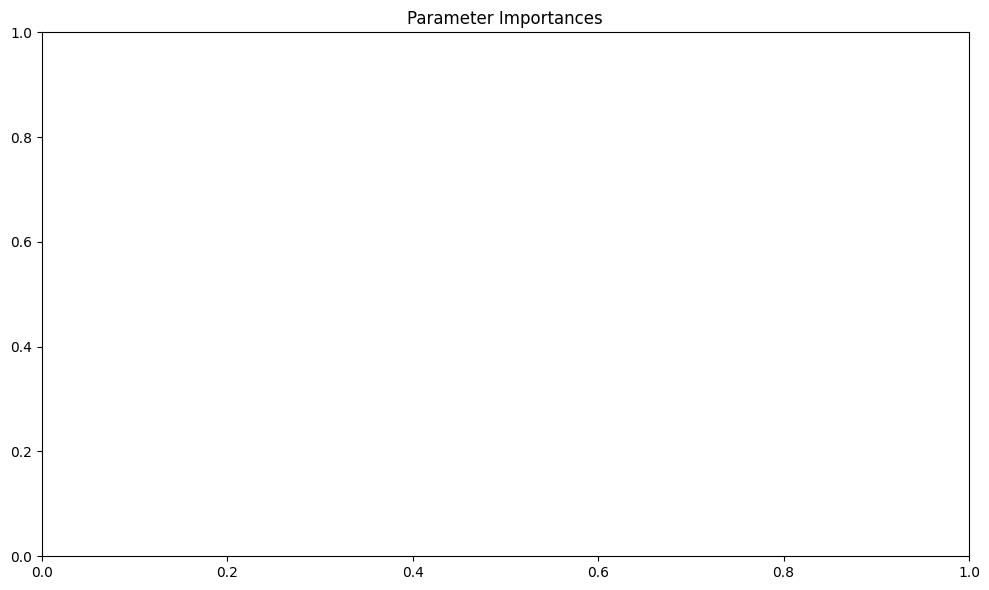

In [7]:
from EduKTM import AKT
import optuna
from optuna.visualization import plot_param_importances

import matplotlib.pyplot as plt

def objective(trial):
    # Hyperparameters to be tuned
    model_type = "pid" #trial.suggest_categorical('model_type', ['pid', 'no_pid'])
    n_blocks = trial.suggest_int('n_blocks', 1, 3)
    d_model = trial.suggest_categorical('d_model', [64, 128, 256, 512])
    dropout = trial.suggest_float('dropout', 0.01, 0.2)
    kq_same = trial.suggest_categorical('kq_same', [0, 1])
    l2 = trial.suggest_float('l2', 1e-6, 1e-4, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    maxgradnorm = trial.suggest_categorical('maxgradnorm', [-1, 0.1, 0.5, 1.0, 5.0])
    
    if model_type == 'pid':
        dat = PID_DATA(n_question=n_question, seqlen=seqlen, separate_char=',')
    else:
        dat = DATA(n_question=n_question, seqlen=seqlen, separate_char=',')
        
    
    train_data, val_data = load_train_val_data(dat)
    
    # Create and train model with the suggested hyperparameters
    akt = AKT(n_question, n_pid, n_blocks, d_model, dropout, kq_same, l2, batch_size, maxgradnorm)
    akt.train(train_data, val_data, epoch=2, lr=lr)  # Using just 1 epoch for faster tuning
    
    # Evaluate and return AUC as the optimization metric
    _, auc, _ = akt.eval(val_data)
    return auc

# Create an Optuna study
study = optuna.create_study(direction='maximize', study_name="akt", storage="sqlite:///../studies.db", load_if_exists=True,)
study.optimize(objective, n_trials=10,)  # Adjust n_trials as needed

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Visualize parameter importances
plt.figure(figsize=(10, 6))
plot_param_importances(study)
plt.title("Parameter Importances")
plt.tight_layout()
plt.show()

In [ ]:
model_type = 'pid'
batch_size = 64
n_blocks = 2
d_model = 512
dropout = 0.10048937628184572
kq_same = 1
l2 = 5.536731898997498e-05
maxgradnorm = 5.0
lr = 0.00041024417516263275

In [12]:
dat = PID_DATA(n_question=n_question, seqlen=seqlen, separate_char=',')
# dat = DATA(n_question=n_question, seqlen=seqlen, separate_char=',')


train_data, val_data = load_train_val_data(dat)
test_data = dat.load_data('test_pid.txt')


akt = AKT(n_question, n_pid, n_blocks, d_model, dropout, kq_same, l2, batch_size, maxgradnorm)
akt.train(train_data, val_data, epoch=1, lr=lr)
akt.save("akt.params")

[Epoch 0] LogisticLoss: 0.390325


INFO:root:save parameters to akt.params


[Epoch 0] auc: 0.844054, accuracy: 0.924781


In [13]:
akt.load("akt.params")
_, auc, accuracy = akt.eval(test_data)
print("auc: %.6f, accuracy: %.6f" % (auc, accuracy))

INFO:root:load parameters from akt.params


auc: 0.920688, accuracy: 0.835254
